In [30]:
# imports and workspace setup
%matplotlib inline
from numba import njit
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")


In [31]:
## enables equation numbering

In [32]:
%%javascript
MathJax.Hub.Config({
    TeX: { equationNumbers: { autoNumber: "all" },
          TagSide: "left"
         }
});

<IPython.core.display.Javascript object>

## The Growth Model


Consider an economy producing a single good that can eiher be consumed or invested
in physical capital.

Time is discrete and takes values $t = 0, 1 , \ldots, T$.  

(We leave open the possibility that $T = + \infty$, but that will require special care
in interpreting and using the **terminal condition**  on $K_t$ at $t = T+1$ to be described below)

Let $C_t$ be consumption at time t.

Let $K_t$ be the stock of physical capital  at time t. 

Let  $\vec{C}$ =$\{C_0,\dots, C_T\}$ and  $\vec{K}$=$\{K_1,\dots,K_{T+1}\}$


Each period each worker possess  a single unit of labor $N_t$, so that 
$N_t =1 \text{ for all } t \in [0,T]$.

A representative household  has preferences over consumption bundles ordered by the utility functional:
<a id='1.1'></a>
$$\begin{equation} U(\vec{C}) = \sum_{t=0}^{T} \beta^t \frac{C_t^{1-\gamma}}{1-\gamma} \tag{1.1} \label{1.1} \end{equation},$$

where $\beta \in (0,1) $ is a discount factor and $\gamma >0 $ governs the curvature of
the one-period utility function 

Note that  $$ \tag{1.1*} u(C_t) = \beta^t \frac{C_t^{1-\gamma}}{1-\gamma} \label{utility}$$ satisfies $u'>0,u''<0$. 

$u' > 0$ asserts the consumer prefers more to less

$u''< 0$  asserts that  marginal utility declines with increases in $C_t$. 

We assume that  $K_0 >  0$ is  a given exogenous level of initial capital.

There is an economy-wide production function that is identical in every period  
<a id='1.2'></a>
$$\begin{equation}F(K_t,N_t) = A K_t^{\alpha}N_t^{1-\alpha} \tag{1.2} \label{1.2} \end{equation}$$

with $0 < \alpha<1$, $A > 0$



A feasible allocation $\vec C, \vec K$ satisfies
<a id='1.3'></a>
$$\begin{equation}C_t + K_{t+1} = F(K_t,N_t) + (1-\delta) K_t, \quad \text{for all } t \in [0, T] \tag{1.3} \label{1.3}  \end{equation}$$

where $\delta \in (0,1)$ is a depreciation rate of capital.


### Planning problem

A planner chooses an allocation $\{\vec{C},\vec{K}\}$ to maximize $(\ref{1.1})$ subject to $(\ref{1.3})$.



Let $\vec{\mu}=\{\mu_0,\dots,\mu_T\}$ be a sequence of nonnegative **Lagrange multipliers** 

To find an optimal allocation, we solve the following max-min problem:
<a id='1.4'></a>
$$\begin{equation}\max_{\vec{C},\vec{K}}\min_{\vec{\mu}}\mathcal{L}(\vec{C},\vec{K},\vec{\mu})=\sum_{t=0}^T \beta^t\left\{ u(C_t)+ \mu_t \left(F(K_t,1) + (1-\delta) K_t- C_t - K_{t+1} \right)\right\} \tag{1.4}\end{equation}$$

### Useful properties of a linearly homogeneous production function: 

Notice that 
<a id='1.5'></a>
$$F(K_t,N_t) = A K_t^\alpha N_t^{1-\alpha} = N_t A\left(\frac{K_t}{N_t}\right)^\alpha \tag{1.5} \label{1.5}$$
<a id='1.6'></a>
Define $$f(\frac{K_t}{N_t}) = A\left(\frac{K_t}{N_t}\right)^\alpha \tag{1.6} \label{1.6}$$ 

Evidently, $f(\frac{K_t}{N_t}) $ is the **output per-capita production function** 

Its argument is  **capital per-capita**

Evidently, 
<a id='1.7'></a>
$$F(K_t,N_t)=N_t f( \frac{K_t}{N_t}). \tag{1.7} $$

Now for some useful calculations:

First
<a id='1.8'></a>
$$\begin{equation}\frac{\partial F}{\partial K} =\frac{\partial N_t f\left( \frac{K_t}{N_t}\right)}{\partial K_t}{=}_{\text{chain rule}} N_t f'\left(\frac{K_t}{N_t}\right)\frac{1}{N_t}= f'\left.\left(\frac{K_t}{N_t}\right)\right|_{N_t=1} = f'(K_t)\end{equation} \tag{1.8} \label{1.8}$$

Also
<a id='1.9'></a>
$$\frac{\partial F}{\partial N} = \frac{\partial N_t f\left( \frac{K_t}{N_t}\right)}{\partial N_t}=_{\text{product rule}}f\left( \frac{K_t}{N_t}\right)+N_t\frac{\partial f\left(\frac{K_t}{N_t}\right)}{\partial N_t}{=}_{\text{chain rule}}f\left(\frac{K_t}{N_t}\right)+ N_t f'\left(\frac{K_t}{N_t}\right)\frac{-K_t}{N_t^2}=f\left(\frac{K_t}{N_t}\right)- \left. \frac{K_t}{N_t}f'\left(\frac{K_t}{N_t}\right)\right|_{N_t=1} = f\left(K_t\right)-K_t f'\left(K_t\right) \tag{1.9}$$




### Back to solving the problem

To solve the Lagrangian extremization problem, we compute first derivatives of the Lagrangian and set them equal to 0.

  * **Note:** Our objective function and constraints satisfy conditions that work to assure that required second-order conditions are satisfied at an allocation that satisfies the first-order conditions that we are about to compute.)



Here are the **first order necessary conditions** for extremization (i.e., maximization
with respect to $\vec C, \vec K$, minimization with respect to $\vec \mu$):

<a id='1.10'></a>
<a id='1.11'></a>
<a id='1.12'></a>
<a id='1.13'></a>
$$\begin{align}  \tag{1.10} \label{1.10} &&& C_t:& \quad u'(C_t)-\mu_t=0 \quad &&\text{for all } t=0,1,\dots,T \\ &&& K_t:& \quad \beta \mu_t\left[(1-\delta)+f'(K_t)\right] -\mu_{t-1}=0 \quad &&\text{for all } t=1,2,\dots,T+1 \tag{1.11} \label{1.11}\\&&& \mu_t:&  \quad F(K_t,1)+ (1-\delta) K_t  - C_t - K_{t+1}=0 \quad &&\text{for all } t=0,1,\dots,T \tag{1.12} \label {1.12}\\ &&& K_{T+1}:& \quad -\mu_T \leq 0, \ <0 \text{ if } K_{T+1}=0; \ =0 \text{ if } K_{T+1}>0  \tag{1.13} \label{1.13} \end{align} $$

Note that in (\ref{1.11})  we plugged in for $\frac{\partial F}{\partial K}$ using our formula (\ref{1.8})  above. 

Because $N_t = 1$ for $t = 1, \ldots, T$,  need not differentiate with respect
to those arguments.

Note that $(\ref{1.12})$ comes from the appearance of $K_t$ in both the period 
$t$ and period $t-1$ feasibility  constraints


$(\ref{1.13})$ comes from differentiating with respect to $K_{T+1}$ in the last period 
and applying the following condition called a **Karush-Kuhn-Tucker condition** (KKT):

<a id='1.14'></a>
$$\mu_T K_{T+1}=0  \tag{1.14} \label{KKT}$$ 

See [Karush-Kuhn-Tucker](en.wikipedia.org/wiki/Karush-Kuhn-Tucker_conditions). 

Combining  $(\ref{1.10})$ and $(\ref{1.11})$ gives 

<a id='1.5'></a>
$$u'\left(C_t\right)\left[(1-\delta)+f'\left(K_t\right)\right]-u'\left(C_{t-1}\right)=0 \quad \text{ for all } t=1,2,\dots, T+1. \tag{1.15}$$ 

Rewriting gives

<a id='1.16'></a>
$$u'\left(C_{t+1}\right)\left[(1-\delta)+f'\left(K_{t+1}\right)\right]=u'\left(C_{t}\right) \quad \text{ for all } t=0,1,\dots, T. \tag{1.16}$$ 

Taking the inverse of the utility function on both sides of the above equation gives

<a id='1.17'></a>
$$C_{t+1} =u'^{-1}\left(\left(\frac{\beta}{u'(C_t)}[f'(K_{t+1}) +(1-\delta)]\right)^{-1}\right) \tag{1.17}$$

or using our utility function $(\ref{utility})$
<a id='1.18'></a>

$$\begin{align} C_{t+1} =\left(\beta C_t^{\gamma}[f'(K_{t+1}) +(1-\delta)]\right)^{1/\gamma} \notag\\= C_t\left(\beta [f'(K_{t+1}) +(1-\delta)]\right)^{1/\gamma} \tag{1.18} \end{align}$$

The above equation is called an  **Euler equation**  for consumption

It tells us how consumption in adjacent periods are optimally related 

We now use some of the the equations above to calculate some variables and functions  that
we'll soon use to solve the planning problem with Python 

In [33]:
# Parameter Values

δ = .02 # depreciation rate on capital
ᾱ = .33 # return to capital per capita
γ̄ = 2.  # coefficient of relative risk aversion
T = 10 # maximum time period

Ā = 1.0 # technology 
β = .95 # discount rate


# utility function and its derivative.
# ASIDE: If you have a utility function that is hard to  solve by hand
# you can use automatic or symbolic  differentiation. See https://github.com/HIPS/autograd 
#we use a decorator called 'njit' to speed up our code. 
@njit #this can be ignored where it occurs. Behind the scenes it is compiling our functions to make them run faster.
def u(c,γ):
    if(γ==1):
        return np.log(c) ## if γ=1 we can show via L'hopital's Rule that the utility becomes log. 
    else:
        return c**(1-γ)/(1-γ)
@njit
def u_prime(c,γ): #derivative of utility
    if(γ==1):
        return 1/c
    else: 
        return c**(-γ)
@njit
def u_prime_inv(c,γ): #1/derivative of utility
    if(γ==1):
        return c
    else: 
        return c**(-1/γ)

#production function and its derivative 
# (again the derivative can be calculated via automatic differentiation if hard to do by hand)
@njit
def f(A,k,α):
    return A*k**α
@njit
def f_prime(A,k,α):
    return α*A*k**(α-1)
@njit
def f_prime_inv(A,k,α):
    return (k/(A*α))**(1/(α-1))

#define an initial value for all c

C = np.zeros(T+1) # T periods of consumption initialized to 0
K = np.zeros(T+2) # T periods of capital initialized to 0. T+2 to include t+1 variable as well.


## Shooting Method

We shall compute an optimal allocation $\vec C, \vec K$ and an associated Lagrange
multiplier sequence $\vec \mu$ using the **shooting method**

The first-order necessary conditions for the planning problem, namely, equations ([1.10](#1.10)), ([1.11](#1.11)),
and ([1.12](#1.12)), form a system of **difference equation** with two boundary conditions:

  * $K_0$ is a given **initial condition** for capital
  
  * $K_{T+1} =0 $ is a **terminal condition** for capital that we deduced from the first-order necessary condition for $K_{T+1}$, the KKT condition ([1.14](#1.14))
  
Notice that we do not have an initial condition for the initial Lagrange multiplier $\mu_0$.
  
If we did, solving for the allocation would be simple:

  * Given $\mu_0$ and $k_0$, we could compute $c_0 $ from equation ([1.10](#1.10)) and then $k_1$ from equation ([1.12](#1.12)) and $\mu_1$ from equation ([1.11](#1.11))
  
  * We could then iterate on this process to compute the remaining elements of $\vec C, \vec K, \vec \mu$ 
 
But we don't have an initial condition for $\mu_0$, so the above algorithm won't work.

But a simple modification of it called the **shooting algorithm**  will work.

The **shooting algorithm** is an instance of a **guess and verify** algorithm

It proceeds as follows:

  * Guess a value for the initial Lagrange multiplier $\mu_0$ 
   
  * Apply the **simple algorithm** described above
  
  * Compute the implied value of $k_{T+1}$ and check whether it equals zero
  
  * If the implied $K_{T+1} =0$, we have solved the problem
  
  * If $K_{T+1} > 0 $, lower $\mu_0$ and try again
  
  * If $K_{T+1} < 0$, raise $\mu_0$ and try again


The following Python code implements the shooting algorithm for the planning problem

We make a slight modification starting with a guess of $c_0$ but since $c_0$ is a function of $\mu_0$ there is no difference to the procedure above

We'll apply it with an initial guess that will turn out not to be perfect, as we'll soon see
  
  

The path of K is:
[ 0.3         0.76612495  1.43810091  2.28880196  3.2959378   4.44174982
  5.71180349  7.09406991  8.57830225 10.15561243 11.81817668 13.55902526]
The path of C is:
[0.2        0.22853998 0.24791735 0.26131611 0.27055886 0.27677065
 0.28069289 0.28284043 0.28358582 0.28320773 0.28192015]


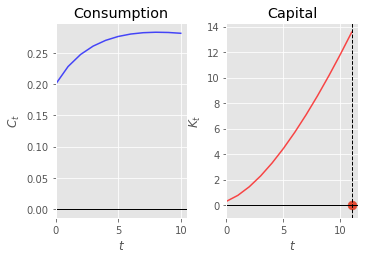

In [34]:
#Initial Guesses
K[0]=.3 # initial k
C[0]=.2 # our guess of c_0.
#To solve this we will write this as a loop. We could also use recursion.
@njit


###SHOOTING METHOD###
def shooting_method(cs,k,Ts,γ̄=γ̄,δ=δ,β=β,ᾱ=ᾱ,Ā=Ā):
    for t in range(Ts):     
        k[t+1]= f(A=Ā,k=k[t],α=ᾱ)+(1-δ)*k[t]-cs[t] #equation 1 with inequality
        if(k[t+1]<0):   #ensure nonnegativity
            k[t+1]=0 
            #equation 2*. #We keep in the general form to show how we would solve if we didn't want to do any simplification.
        if((β*(f_prime(A=Ā,k=k[t+1],α=ᾱ)+(1-δ)))==np.inf):
            cs[t+1]=0 ## this only occurs if k[t+1] is 0, in which case, we won't produce anything next period, so consumption will have  to  be  0.
        else:    
            cs[t+1]=u_prime_inv(u_prime(c=cs[t],γ=γ̄)/(β*(f_prime(A=Ā,k=k[t+1],α=ᾱ)+(1-δ))),γ=γ̄)
    k[Ts+1]= f(A=Ā,k=k[Ts],α=ᾱ)+(1-δ)*k[Ts]-cs[Ts] #terminal condition calculation
            
    print('The path of K is:')
    print(k)
    print('The path of C is:')
    print(cs)
    return (cs,k)

#Now we run the shooting method

path_C,path_K = shooting_method(C,K,T)

#Graphs

plt.subplot(121)
plt.plot(range(T+1),path_C,color='blue',alpha=.7)
plt.title('Consumption')
plt.ylabel('$C_t$')
plt.xlabel('$t$')
plt.xlim(0,)
plt.axhline(0,color='black', lw=1)

plt.subplot(122)
plt.plot(range(T+2),path_K,color='red',alpha=.7)
plt.axvline(11,color='black',ls='--',lw=1)
plt.axhline(0,color='black', lw=1)
plt.title('Capital')
plt.ylabel('$K_t$')
plt.xlim(0,)
plt.xlabel('$t$')
plt.scatter(11,0,s=80)
plt.subplots_adjust(left=0.2, wspace=0.3, top=0.8)
plt.show()

Evidently our initial guess for $\mu_0$ was too high and therefore  initial consumption is too low

We know this becuase we miss our $K_{T+1}=0$ target on the high side
 

Now we automate things with a search-for-a-good $\mu_0$ algorithm that stops when we
hit the target $K_{t+1} = 0$ 

The search procedure is to  use a  **bisection method** 



Here is how we apply the bisection method

We take an initial guess for $C_0$ (we can eliminate $\mu_0$ because $C_0$ is an exact
function of $\mu_0$)

We know that the lowest $C_0$ can ever be is $0$ and the largest it can be is initial output $f(K_0)$. 


Takes  a $C_0$ guess and shoot forward to $T+1$.

If the $K_{T+1}>0$, let it be our new **lower** bound on $C_0$. 

If $K_{T+1}<0$, let it be  our new  **upper**  bound.

Make a new guess  for $C_0$ exactly halfway between our new upper and lower bounds

Shoot forward again and iterate the procedure

When $K_{T+1}$ gets close enough to 0 (within some error tolerance bounds), stop
and declare victory


In [35]:
%%capture

@njit

###BISECTION METHOD### 
def bisection_method(c_init_guess,c_val,k_val,T_val,γ̄=γ̄,δ=δ,β=β,ᾱ=ᾱ,Ā=Ā,tol=10**-4,max_iter=10000,terminal=0):
# tol degree of numerical precision
#max_iter maximum number of iterations
#terminal represents the value we are shooting towards,default is 0
    i=1 #initial iteration
    c_high=f(k=k_val[0],α=ᾱ,A=Ā) #initial high value of c
    c_low = 0 # initial low value of c
    c_val[0]=c_init_guess
    path_c,path_k=shooting_method(c_val,k_val,T_val,γ̄,δ,β,ᾱ,Ā)
    while ((((path_k[T_val+1]-terminal)>tol)|((path_k[T_val+1]-terminal)<-tol)|(path_k[T_val]==(terminal)))&(i<max_iter)):
        print('Iteration: ',i)
        if((path_k[T_val+1]-terminal)>tol):
            c_low=c_val[0] #if assets are too high the c[0] we chose is now a lower bound on possible values of c[0]
        elif((path_k[T_val+1]-terminal)<-tol):
            c_high=c_val[0] #if assets fell too quickly, the c[0] we chose is now an upper bound on possible values of c[0]
        elif(path_k[T_val]==(terminal)):
            c_high=c_val[0] #if assets fell  too quickly, the c[0] we chose is now an upper bound on possible values of c[0]
        c_val[0]=(c_high+c_low)/2 #value in middle of high and low value. This is the bisection part
        path_c,path_k = shooting_method(c_val,k_val,T_val,γ̄,δ,β,ᾱ,Ā)
        i=i+1
    if(((path_k[T_val+1]-terminal)<tol)&(path_k[T_val]!=terminal)&((path_k[T_val+1]-terminal)>-tol)):
       print('Converged successfully on iteration',i-1)
    else:
       print('Failed to converge and hit maximum iteration')
    mu=u_prime(c=path_c,γ=γ̄)
    return (path_c.copy(),path_k.copy(),mu)
#run bisection method
path_opt_C,path_opt_K,path_opt_mu=bisection_method(.3,C,K,T)

Now we can plot:

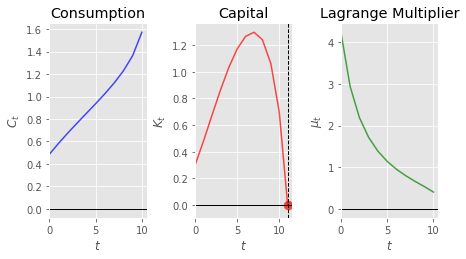

In [36]:
plt.subplot(131)
plt.plot(range(T+1),path_opt_C,color='blue',alpha=.7)
plt.title('Consumption')
plt.ylabel('$C_t$')
plt.xlabel('$t$')
plt.xlim(0,)
plt.axhline(0,color='black', lw=1)

plt.subplot(132)
plt.plot(range(T+2),path_opt_K,color='red',alpha=.7)
plt.axvline(11,color='black',ls='--',lw=1)
plt.axhline(0,color='black', lw=1)
plt.title('Capital')
plt.ylabel('$K_t$')
plt.xlim(0,)
plt.xlabel('$t$')
plt.scatter(11,0,s=80)
plt.subplot(133)
plt.plot(range(T+1),path_opt_mu,color='green',alpha=.7)
plt.title('Lagrange Multiplier')
plt.ylabel('$\mu_t$')
plt.xlabel('$t$')
plt.xlim(0,)
plt.axhline(0,color='black', lw=1)
plt.subplots_adjust(left=0.0, wspace=0.5, top=0.8)

plt.show()

#### Setting $K_0$ equal to steady state

If $T \rightarrow +\infty$, the optimal allocation converges to steady state
valuess of $C_t$ and $K_t$

It is instructive to compute these and then to set $K_0 $ equal to its steady state value



In a steady state $K_{t+1} = K_t=\bar{K}$ for all very large $t$
<a id='2.1'></a>
In a steady state the feasibility constraint ([1.3](#1.3)) is   $$f(\bar{K})-\delta \bar{K} = \bar{C} \label{2.1} \tag{2.1}$$


Substituting $K_t = \bar K$ and $C_t=\bar C$ for all $t$ into  ([1.16](#1.16)) gives 
<a id='2.2'></a>
$$1=\beta \frac{u'(\bar{C})}{u'(\bar{C})}[f'(\bar{K})+(1-\delta)] \tag{2.2} \label{2.2}$$

Defining $\beta = \frac{1}{1+\rho}$, and cancelling gives  
<a id='2.3'></a>
$$1+\rho = 1[f'(\bar{K}) + (1-\delta)] \tag{2.3} \label{2.3}$$
<a id='2.4'></a>
<a id='2.5'></a>
Simplifying  gives  $$f'(\bar{K}) = \rho +\delta \tag{2.4} \label{2.4}$$, $$\bar{K} = f'^{-1}(\rho+\delta) \tag{2.5} \label{2.5}$$

Using our production function ([1.2](#1.2)) gives :
<a id='2.6'></a>
$$\alpha \bar{K}^{\alpha-1} = \rho + \delta \tag{2.6} \label{2.6}$$

Finally, using $\alpha= .33$, $\rho = 1/\beta-1 =1/(19/20)-1 = 20/19-19/19 = 1/19$, $\delta = 1/50$, we get: 
<a id='2.7'></a>
$$\bar{K} = \left(\frac{\frac{33}{100}}{\frac{1}{50}+\frac{1}{19}}\right)^{\frac{67}{100}} \approx 9.57583  \tag{2.7} \label{2.7} $$

Let's verify this with Python and then use this steady state $\bar K$ as our initial capital
stock $K_0$

In [37]:
ρ=1/β-1
K_ss = f_prime_inv(k=ρ+δ,A=Ā,α=ᾱ)

print('Steady state for capital is:',K_ss)

Steady state for capital is: 9.57583816331462


In [38]:
%%capture
K_init_val = K_ss #at our steady state
T_new=150
C_new=np.zeros(T_new+1)
K_new=np.zeros(T_new+2)
K_new[0]=K_init_val
path_opt_C_new,path_opt_K_new,path_opt_mu_new=bisection_method(.3,C_new,K_new,T_new)

And now we plot

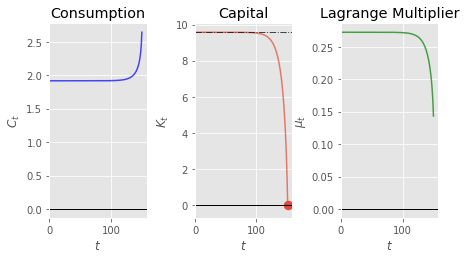

In [39]:
plt.subplot(131)
plt.plot(range(T_new+1),path_opt_C_new,color='blue',alpha=.7, )

plt.title('Consumption')
plt.ylabel('$C_t$')
plt.xlabel('$t$')
plt.xlim(0,)
plt.axhline(0,color='black', lw=1)

plt.subplot(132)
plt.plot(range(T_new+2),path_opt_K_new,alpha=.7)
plt.axhline(K_ss,linestyle='-.',color='black', lw=1,alpha=.7)
plt.axhline(0,color='black', lw=1)
plt.title('Capital')
plt.ylabel('$K_t$')
plt.xlabel('$t$')
plt.xlim(0,)
plt.scatter(T_new+1,0,s=80) 
plt.subplot(133)
plt.plot(range(T_new+1),path_opt_mu_new,color='green',alpha=.7)
plt.title('Lagrange Multiplier')
plt.ylabel('$\mu_t$')
plt.xlabel('$t$')
plt.xlim(0,)
plt.axhline(0,color='black', lw=1)
plt.subplots_adjust(left=0.0, wspace=0.5, top=0.8)

plt.show()

Evidently in this economy with a large value of $T$, $K_t$ stays near its initial value
at the until the end of time approaches closely

Evidently, the planner likes the steady state capital stock and wants to stay near there for a long time


Let's see what happens when we push the initial $K_0$ below $\bar K$



In [40]:
%%capture
K_init_val = K_ss/3 #below our steady sstate
T_new=150
C_new=np.zeros(T_new+1)
K_new=np.zeros(T_new+2)
K_new[0]=K_init_val
path_opt_C_new,path_opt_K_new,path_opt_mu_new=bisection_method(.3,C_new,K_new,T_new)

The following code plots the optimal allocation

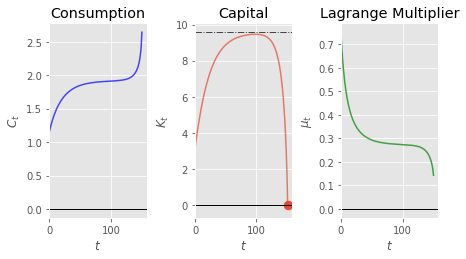

In [41]:
plt.subplot(131)
plt.plot(range(T_new+1),path_opt_C_new,color='blue',alpha=.7, )

plt.title('Consumption')
plt.ylabel('$C_t$')
plt.xlabel('$t$')
plt.xlim(0,)
plt.axhline(0,color='black', lw=1)

plt.subplot(132)
plt.plot(range(T_new+2),path_opt_K_new,alpha=.7)
plt.axhline(K_ss,linestyle='-.',color='black', lw=1,alpha=.7)
plt.axhline(0,color='black', lw=1)
plt.title('Capital')
plt.ylabel('$K_t$')
plt.xlabel('$t$')
plt.xlim(0,)
plt.scatter(T_new+1,0,s=80)
plt.subplot(133)
plt.plot(range(T_new+1),path_opt_mu_new,color='green',alpha=.7)
plt.title('Lagrange Multiplier')
plt.ylabel('$\mu_t$')
plt.xlabel('$t$')
plt.xlim(0,)
plt.axhline(0,color='black', lw=1)
plt.subplots_adjust(left=0.0, wspace=0.5, top=0.8)
plt.show()

Notice how the planner pushes capital toward the steady state, stays near there for a while, then pushes $K_t$ toward the terminal value $K_{T+1} =0 $ as $t$ gets close to $T$


The following graphs compare outcomes as we vary $T$


In [42]:
%%capture
K_new[0]=K_init_val
path_opt_C_new,path_opt_K_new,path_opt_mu_new=bisection_method(.3,C_new,K_new,T_new)
T_new_2=75
C_new_2=np.zeros(T_new_2+1)
K_new_2=np.zeros(T_new_2+2)
K_new_2[0]=K_init_val
path_opt_C_2,path_opt_K_2,path_opt_mu_new_2=bisection_method(.3,C_new_2,K_new_2,T_new_2);
T_new_3=50
C_new_3=np.zeros(T_new_3+1)
K_new_3=np.zeros(T_new_3+2)
K_new_3[0]=K_init_val
path_opt_C_3,path_opt_K_3,path_opt_mu_new_3=bisection_method(.3,C_new_3,K_new_3,T_new_3);
T_new_4=25
C_new_4=np.zeros(T_new_4+1)
K_new_4=np.zeros(T_new_4+2)
K_new_4[0]=K_init_val
path_opt_C_4,path_opt_K_4,path_opt_mu_new_4=bisection_method(.3,C_new_4,K_new_4,T_new_4);

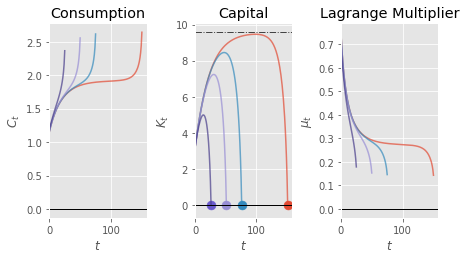

In [43]:
plt.subplot(131)
plt.plot(range(T_new+1),path_opt_C_new,path_opt_C_2,alpha=.7)
plt.plot(range(T_new_3+1),path_opt_C_3, alpha=.7)
plt.plot(range(T_new_4+1),path_opt_C_4,color='darkslateblue', alpha=.7)
plt.title('Consumption')
plt.ylabel('$C_t$')
plt.xlabel('$t$')
plt.xlim(0,)
plt.axhline(0,color='black', lw=1)

plt.subplot(132)
plt.plot(range(T_new+2),path_opt_K_new,path_opt_K_2,alpha=.7)
plt.plot(range(T_new_3+2),path_opt_K_3, alpha=.7)
plt.plot(range(T_new_4+2),path_opt_K_4,color='darkslateblue', alpha=.7)
plt.axhline(0,color='black', lw=1)
plt.axhline(K_ss,linestyle='-.',color='black', lw=1,alpha=.7)
plt.title('Capital')
plt.ylabel('$K_t$')
plt.xlabel('$t$')
plt.xlim(0,)
plt.scatter(T_new+1,0,s=80)
plt.scatter(T_new_2+1,0,s=80)
plt.scatter(T_new_3+1,0,s=80)
plt.scatter(T_new_4+1,0,s=80, color='slateblue')
plt.subplots_adjust(left=0.2, wspace=0.5, top=0.8)
plt.subplot(133)
plt.plot(range(T_new+1),path_opt_mu_new,path_opt_mu_new_2,alpha=.7)
plt.plot(range(T_new_3+1),path_opt_mu_new_3,alpha=.7)
plt.plot(range(T_new_4+1),path_opt_mu_new_4,color='darkslateblue',alpha=.7)
plt.title('Lagrange Multiplier')
plt.ylabel('$\mu_t$')
plt.xlabel('$t$')
plt.xlim(0,)
plt.axhline(0,color='black', lw=1)
plt.subplots_adjust(left=0.0, wspace=0.5, top=0.8)
plt.show()

The following calculation shows that when   we set  $T$ very large
the planner makes the capital stock spend most of its time close to its steady state value.


In [44]:
%%capture
T_new_large=250
C_new_large=np.zeros(T_new_large+1)
K_new_large=np.zeros(T_new_large+2)
K_new_large[0]=K_init_val
path_opt_C_large,path_opt_K_large,path_opt_mu_large=bisection_method(.3,C_new_large,K_new_large,T_new_large);

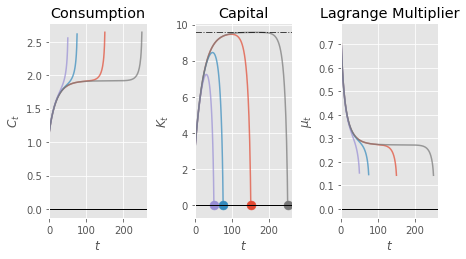

In [45]:
plt.subplot(131)
plt.plot(range(T_new+1),path_opt_C_new,path_opt_C_2,alpha=.7)
plt.plot(range(T_new_3+1),path_opt_C_3, alpha=.7)
plt.plot(range(T_new_large+1),path_opt_C_large,alpha=.7)
plt.title('Consumption')
plt.ylabel('$C_t$')
plt.xlabel('$t$')
plt.xlim(0,)
plt.axhline(0,color='black', lw=1)

plt.subplot(132)
plt.plot(range(T_new+2),path_opt_K_new,path_opt_K_2,alpha=.7)
plt.plot(range(T_new_3+2),path_opt_K_3, alpha=.7)
plt.plot(range(T_new_large+2),path_opt_K_large,alpha=.7)
plt.axhline(0,linestyle='-',color='black', lw=1)
plt.axhline(K_ss,linestyle='-.',color='black',lw=1,  alpha=.7)
plt.title('Capital')
plt.ylabel('$K_t$')
plt.xlabel('$t$')
plt.xlim(0,)
plt.scatter(T_new+1,0,s=80)
plt.scatter(T_new_2+1,0,s=80)
plt.scatter(T_new_3+1,0,s=80)
plt.scatter(T_new_large+1,0,s=80)
plt.subplot(133)
plt.plot(range(T_new+1),path_opt_mu_new,path_opt_mu_new_2,alpha=.7)
plt.plot(range(T_new_3+1),path_opt_mu_new_3,alpha=.7)
plt.plot(range(T_new_large+1),path_opt_mu_large,alpha=.7)
plt.title('Lagrange Multiplier')
plt.ylabel('$\mu_t$')
plt.xlabel('$t$')
plt.xlim(0,)
plt.axhline(0,color='black', lw=1)
plt.subplots_adjust(left=0.0, wspace=0.5, top=0.8)
plt.show()

The different colors in the above graphs are tied to outcomes with different horizons $T$

Notice that as the hoizon increases, the planner puts $K_t$ closer to the steady state
value $\bar K$ for longer.  

This pattern reflects a **turnpike** property of the steady state.

A rule of thumb for the planner is 

  * for whatever $K_0$ you start with, push $K_t$ toward the stady state and stay there for as long as you can
  
In loose language

  * head for the turnpick and stay near it for as long as you can

As we drive $T $ toward $+\infty$, the planner keeps $K_t$ very close to its steady state
for all dates after some transition toward the steady state


The planner makes the saving rate $\frac{f(K_t) - C_t}{f(K_t)}$ vary over time

Let's calculate it


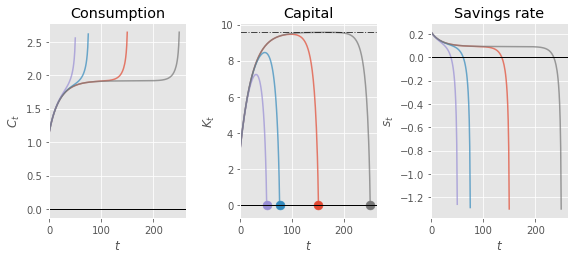

In [46]:
# savings calculation and plotting:

##Aggregate savings 
def S(K,δ,T):
    S=np.zeros(T+1)
    for t in range(0,T+1):
        S[t]=K[t+1]-(1-δ)*K[t]
    return S
#savings rate
def s(A,K,α,δ,T):
    S_var=np.zeros(T+1)
    S_var=S(K,δ,T)
    Y=f(A,K,α)
    Y_var=Y[0:T+1]
    s=S_var/Y_var
    return s

path_opt_s_new=s(Ā,path_opt_K_new,ᾱ,δ,T_new)
path_opt_s_2=s(Ā,path_opt_K_2,ᾱ,δ,T_new_2)
path_opt_s_3=s(Ā,path_opt_K_3,ᾱ,δ,T_new_3)
path_opt_s_large=s(Ā,path_opt_K_large,ᾱ,δ,T_new_large)

plt.subplot(131)
plt.plot(range(T_new+1),path_opt_C_new,path_opt_C_2,alpha=.7)
plt.plot(range(T_new_3+1),path_opt_C_3, alpha=.7)
plt.plot(range(T_new_large+1),path_opt_C_large,alpha=.7)
plt.title('Consumption')
plt.ylabel('$C_t$')
plt.xlabel('$t$')
plt.xlim(0,)
plt.axhline(0,color='black', lw=1)

plt.subplot(132)
plt.plot(range(T_new+2),path_opt_K_new,path_opt_K_2,alpha=.7)
plt.plot(range(T_new_3+2),path_opt_K_3, alpha=.7)
plt.plot(range(T_new_large+2),path_opt_K_large,alpha=.7)
plt.axhline(0,linestyle='-',color='black', lw=1)
plt.axhline(K_ss,linestyle='-.',color='black',lw=1,  alpha=.7)
plt.title('Capital')
plt.ylabel('$K_t$')
plt.xlabel('$t$')
plt.xlim(0,)
plt.scatter(T_new+1,0,s=80)
plt.scatter(T_new_2+1,0,s=80)
plt.scatter(T_new_3+1,0,s=80)
plt.scatter(T_new_large+1,0,s=80)
plt.subplot(133)
plt.plot(range(T_new+1),path_opt_s_new,path_opt_s_2,alpha=.7)
plt.plot(range(T_new_3+1),path_opt_s_3, alpha=.7)
plt.plot(range(T_new_large+1),path_opt_s_large,alpha=.7)
plt.axhline(0,color='black', lw=1)
plt.title('Savings rate')
plt.ylabel('$s_t$')
plt.xlabel('$t$')
plt.xlim(0,)
plt.subplots_adjust(left=0.0, wspace=0.4, top=0.8,right=1.2)
plt.show()

### $T=+\infty$ economy

We now consider an economy in which $T = +\infty$ 

The appropriate thing to do is to replace terminal condition (\ref{1.13}) with 

$$ \lim_{T \rightarrow +\infty} \beta^T u'(C_T) K_T = 0 $$

This condition will be satisfied by a path that converges to an optimal  steady state 

We can approximate the optimal path from an arbitrary initial $K_0$ and shooting toward the optimal steady
state $K$ at a large but finite $T+1$


In the following code, we do this for  a large $T$; we  shoot towards the **steady state** and plot consumption, capital and the savings rate. 

We know that in the steady state that the saving rate must be fixed and that $\bar s= \frac{f(\bar K)-\bar C}{f(\bar K)}$. 

From ([2.1](#2.1)) the steady state saving rate  equals

<a id='2.8'></a>

$$\bar s =\frac{ \delta \bar{K}}{f(\bar K)} \tag{2.8} \label{2.8}$$. 

The steady-state savings level  $\bar S = \bar s f(\bar K)$ is exactly the amount required to offset capital depreciation each period. 


We first study optimal capital  paths that start below the steady state.

In [47]:
%%capture
T_vlarge=130
K_init_val = K_ss/3 #below our steady state
S_ss = δ*K_ss
C_ss= f(Ā,K_ss,ᾱ)-S_ss
s_ss= S_ss/f(Ā,K_ss,ᾱ)
C_vlarge=np.zeros(T_vlarge+1)
K_vlarge=np.zeros(T_vlarge+2)
K_vlarge[0]=K_init_val
path_opt_C_vlarge,path_opt_K_vlarge,path_opt_mu_vlarge=bisection_method(.3,C_vlarge,K_vlarge,T_vlarge,tol=1e-8,terminal=K_ss)
path_opt_s_vlarge=s(Ā,path_opt_K_vlarge,ᾱ,δ,T_vlarge)

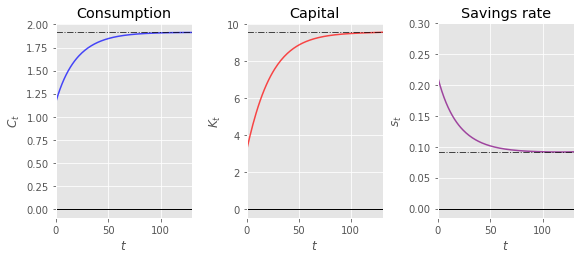

In [48]:
plt.subplot(131)
plt.plot(range(T_vlarge+1),path_opt_C_vlarge,alpha=.7,color='blue')
plt.axhline(C_ss,linestyle='-.',color='black',lw=1,  alpha=.7)
plt.title('Consumption')
plt.ylabel('$C_t$')
plt.xlabel('$t$')
plt.xlim(0,T_vlarge)
plt.axhline(0,color='black', lw=1)

plt.subplot(132)
plt.plot(range(T_vlarge+2),path_opt_K_vlarge,alpha=.7,color='red')
plt.axhline(0,linestyle='-',color='black', lw=1)
plt.axhline(K_ss,linestyle='-.',color='black',lw=1,  alpha=.7)
plt.title('Capital')
plt.ylabel('$K_t$')
plt.xlabel('$t$')
plt.xlim(0,T_vlarge+1)

plt.subplot(133)
plt.plot(range(T_vlarge+1),path_opt_s_vlarge,alpha=.7,color='purple')
plt.axhline(s_ss,linestyle='-.',color='black',lw=1,  alpha=.7)
plt.axhline(0,color='black', lw=1)
plt.title('Savings rate')
plt.ylabel('$s_t$')
plt.xlabel('$t$')
plt.ylim(-.015,.3)
plt.xlim(0,T_vlarge)
plt.subplots_adjust(left=0.0, wspace=0.4, top=0.8,right=1.2)
plt.show()

Since $K_0<\bar K$,  $f'(K_0)>\rho +\delta$. 


The planner  choose a positive saving rate above the steady state level offsetting depreciation that enables us to increase our capital stock. 

Note, $f''(K)<0$,  so as  $K$ rises, $f'(K)$ declines.

The planner slowly lowers the savings rate until reaching a steady state where $f'(K)=\rho +\delta$. 


### Exercise: 

  * Plot the optimal consumption, capital, and savings paths when the initial capital level begins at 1.5 times the steady state level  as we shoot towards the steady state at  $T=130$. 
  
  * Why does the savings rate respond like it does?

In [2]:
# To fill in 

### Solution

## Competitive Equilibrium


We now study a decentralized version of an economy with same technology and preference structure as our planned economy

But now there is no planner


Market prices adjust to reconcile distinct decisions are made separately by a representative household and a representative firm 

The technology for producing goods and accumulating capital via physical investment that is
the same as that in the preceding economy


There is a representative consumer who has the same  preferences over consumption plans 
as did the consumer in the planner economy  

Instead of being told what to consume and save by the planner, the household chooses for 
itself subject to a budget constraint

  * At each time $t$, the household receives wages and rentals of capital from a firm -- these comprise its **income** at time $t$
  
  * The consumer decides how much of this income to allocate to  consumption or
   saving 
   
  * The household can save either by acquiring additional physical capital (it trades one for one
  with time $t$ consumption) or by acquiring claims on consumption at dates other than $t$
  
  
 * A utility maximizing  household owns the physical capital and labor and rents them to the firm 

 * The household  consumes, supplies labor,  and invests in physical capital
 
 * A profit maximizing representative firm operates the producion technology.
 
 * The firm rents labor and capital each period from the representative household and sells
 its output each period to the household
 
 * The representative household and the representative firm are both **price takers:**
 
     * they (correctly) believe that prices are not affected by their choices
 
 
 **Note:** We are free to think of there being a large number $M$ of identical representative
 consumers and $M$ identical representative firms.  
 
 

### Firm Problem

At time $t$ the representative firm hires labor $\tilde n_t$ and capital $\tilde k_t$

The firm's profits at time $t$ are
<a id='3.1'></a>
$$F(\tilde k_t, \tilde n_t)-w_t \tilde n_t -\eta_t k_t, \label{3.1} \tag{3.1}$$

where $w_t$ is a wage rate at $t$ and and $\eta_t$ is the rental rate on capital
at $t$


As in the preceding model,
<a id='3.2'></a>
$$F(\tilde k_t, \tilde n_t) = A \tilde k_t^\alpha \tilde n_t^{1-\alpha}. \label{3.2} \tag{3.2}$$


##### Zero profit conditions

Zero-profits condition for capital and labor are 
<a id='3.3'></a>
$$ F_k(\tilde k_t, \tilde n_t) =\eta_t \label{3.3} \tag{3.3}$$

and 
<a id='3.4'></a>
$$F_n(\tilde k_t, \tilde n_t) =w_t \label{3.4} \tag{3.4}$$

These conditions emerge from a no-arbitrage requirement 


To describe these, we begin by applying a theorm of Euler about linearly homogenous functions.

The theorem applies to the Cobb-Douglas production function
because it assumed displays  constant returns to scale:
<a id='3.5'></a>
$$\alpha F(\tilde k_t, \tilde n_t) =  F(\alpha  \tilde k_t, \alpha \tilde n_t) \label{3.5} \tag{3.5}$$ for 
$\alpha \in (0,1)$.

Taking the partial derivative $\frac{\partial F }{\partial \alpha}$ on both sides of the above equation gives
<a id='3.6'></a>
$$F(\tilde k_t,\tilde n_t) =_\text{chain rule} \frac{\partial F}{\partial \tilde k_t} \tilde k_t + \frac{\partial F}{\partial \tilde  n_t} \tilde n_t \label{3.6} \tag{3.6}$$

Rewrite the firm's profits as 
<a id='3.7'></a>
$$\frac{\partial F}{\partial \tilde k_t} \tilde k_t + \frac{\partial F}{\partial \tilde  n_t} \tilde n_t-w_t \tilde n_t -\eta_t k_t. \label{3.7} \tag{3.7}$$

or
<a id='3.8'></a>
$$\left(\frac{\partial F}{\partial \tilde k_t}-\eta_t\right) \tilde k_t + \left(\frac{\partial F}{\partial \tilde  n_t}-w_t\right) \tilde n_t \label{3.8} \tag{3.8}$$


Because  $F$ is homogeneous of degree $1$, it follows that
$\frac{\partial F}{\partial \tilde k_t}$ and $\frac{\partial F}{\partial \tilde n_t}$ are homogoneous of degree $0$ and therefore fixed with respect to $\tilde k_t$ and $\tilde n_t$ .

If $\frac{\partial F}{\partial \tilde k_t}> \eta_t$, then the firm makes positive profits on each additional unit of $\tilde k_t$,  so it will want to make  $\tilde k_t$ arbitrarily large

But setting $\tilde k_t = + \infty$ is not physically feasible, so presumably **equilibrium** prices will assume values that present the firm with no such arbitrage opportunity.

A related argument applies if $\frac{\partial F}{\partial \tilde n_t}> w_t$. 

If $\frac{\partial \tilde k_t}{\partial \tilde k_t}< \eta_t$, the firm will set $\tilde k_t$ to
zero.  Again, **equilibrium** prices won't incentive the firm to do that.

And so on .


It is convenient to define  $\vec w_t =\{w_0, \dots,w_T\}$ and $\vec \eta_t = \{\eta_0, \dots, \eta_T\}$

### Household Problem

A representative household  lives at $t=0,1,\dots, T$. 

At $t$, the household rents $1$ unit of labor and $k_t$ units of capital to a firm and
receives income of  
<a id='3.9'></a>
$$w_t 1+ \eta_t k_t \label{3.9} \tag{3.9}$$

At $t$ the household allocates its income to the following purchases 
<a id='3.10'></a>
$$\left(c_t + (k_{t+1} -(1-\delta)k_t)\right). \label{3.10} \tag{3.10}$$ 

Here  $\left(k_{t+1} -(1-\delta)k_t)\right)$ is the household's net  investment in physical 
capital and $\delta \in (0,1)$ is again a depreciation rate of capital. 

In period $t$ is free to  purchase more goods to be  consumed and invested in physical capital than its income from supplying capital and labor to the firm,   provided that in some other periods
its income exceeds its purchases

A  household's net excess demand for time $t$ consumption goods is the gap 
<a id='3.11'></a>
$$e_t \equiv \left(c_t + (k_{t+1} -(1-\delta)k_t)\right)-(w_t 1 + \eta_t k_t) \label{3.11} \tag{3.11}$$

Let $\vec c = \{c_0,\dots,c_T\}$ and let $\vec k = \{k_1,\dots,k_T+1\}$. 

$k_0$ is given to the household


### Market structure for intertemporal trades

There is a **single** grand competitive market in which a representative  household can
trade  date $0$  goods for goods at any other date $t=1, 2, \ldots, T$. 

In this market, what matters is not **bilateral** trades of the good   at one date $t$
for the good at another date $\tilde t \neq t$.  

Instead, think of there be **multilateral** or really **multitemporal** trades in which
bundles of goods at some dates can be traded for bundles of goods at some other dates.  

There exist **complete markets** in such bundles with associated market prices

#### Market prices

Let $q^0_t$ be the price of a  good at date $t$ relative to a
good at date $0$.



$\{q^0_t\}_{t=0}^T$ is a vector of Hicks-Arrow  prices, named after two joint Nobel prize winners
who used such prices extensively

Evidently, 

<a id='3.12'></a>
$$q^0_t=\frac{\text{# of time 0 goods}}{\text{# of time t goods}}. \label{3.12} \tag{3.12}$$

Because $q^0_t$ is a **relative price**, the units in terms of which prices are quoted are arbitrary -- we can normalize them  without substantial consequence 

If we use the price vector $\{q^0_t\}_{t=0}^T$ to evaluate a stream of excess demands
$\{e_t\}_{t=0}^T$ we compute the **present value** of $\{e_t\}_{t=0}^T$
to be $\sum_{t=0}^T q^0_t e_t$


That the market is **multitemporal** is reflected in the situation that the household faces a **single** budget constraint

It states that the present value of the  household's net excess demands must be zero:
<a id='3.13'></a>
$$ \sum_{t=0}^T q^0_t e_t  \leq 0  \label{3.13} \tag{3.13}$$

or
<a id='3.14'></a>
$$ \sum_{t=0}^T q^0_t  \left(c_t + (k_{t+1} -(1-\delta)k_t)-(w_t 1 + \eta_t k_t) \right) \leq 0 \label{3.14} \tag{3.14}$$

### Household problem
The household faces the constrained optimization problem:  
<a id='3.15'></a>
$$\begin {align*}& \max_{\vec c, \vec k}  \sum_{t=0}^T \beta^t u(c_t) \label{3.15} \tag{3.15}\\ \text{subject to} \ \   & \sum_{t=0}^T q_t^0\left(c_t +\left(k_{t+1}-(1-\delta) k_t\right) -w_t -\eta_t k_t\right) \leq 0  \notag \end{align*}$$



### Definitions

* A **price system** is a sequence 
$\{q_t^0,\eta_t,w_t\}_{t=0}^T= \{\vec q, \vec \eta, \vec w\}.$

* An **allocation** is a sequence
$\{c_t,k_{t+1}, k_{t+1},n_t=1\}_{t=0}^T = \{\vec c, \vec k, \vec n =\vec n\}$

* A **competitive equilibrium** is a price system and an allocation for which


   * Given the price system, the allocation solves the  household's problem 

   * Given the price system, the allocation solves the firm's problem

### Computing a Competitive Equilibrium

We shall compute a competitive equilibrium using a **guess and verify** approach

  * We shall **guess** equilibrium price sequences $\{\vec q, \vec \eta, \vec w\}$
  
  * We shall then **verify** that at those prices, the household and the firm  choose the same     allocation 
    

### Guess for price system

We have computed an allocation $\{\vec C, \vec K, \vec 1\}$ that solves the planning problem

We use that allocation to construct our guess for the equilibium price system

In particular, we guess  that for $t=0,\dots,T$:

<a id='3.16'></a>
$$\lambda q_t^0 = \beta^t u'(K_t) =\beta^t \mu_t \label{3.16} \tag{3.16}$$ 
<a id='3.17'></a>
$$w_t = f(K_t) -K_t f'(K_t)  \label{3.17} \tag{3.17}$$ 
<a id='3.18'></a>
$$\eta_t = f'(K_t) \label{3.18} \tag{3.18}$$


At these prices, let the capital chosen by the household be 

<a id='3.19'></a>
$$ k^*_t(\vec q, \vec w, \vec \eta) , \quad t \geq 0 \label{3.19} \tag{3.19}$$ 

and let the allocation chosen by the firm be

<a id='3.20'></a>
$$ \tilde k^*_t(\vec q, \vec  w, \vec \eta), \quad t \geq 0 \label{3.20} \tag{3.20}$$

and so on.  


If our guess for the equilibrium price system is correct, 
then it must occur that

<a id='3.21'></a>
<a id='3.22'></a>
<a id='3.23'></a>
$$ \begin{align} 
k_t^* & = \tilde k_t^*  \label{3.21} \tag{3.21}\\
1 &  = \tilde n_t^*  \label{3.22} \tag{3.22}\\
c_t^* + k_{t+1}^* - (1-\delta) k_t^* & = F(\tilde k_t^*, \tilde n_t^*)  \label{3.23} \tag{3.23}
\end{align} $$

We shall verify that for  $t=0,\dots,T$ the allocations chosen by the household and the firm
both equal the allocation that solves the planning problem:

<a id='3.24'></a>
$$k^*_t = \tilde k^*_t=K_t, \tilde n_t=1, c^*_t=C_t \label{3.24} \tag{3.24}$$



### Verification procedure

Our approach is to stare at  first-order necessary conditions for the
optimization problems of the household and the firm


At the price system we have guessed,  both sets of first-order conditions are satisfied at the allocation that solves the planning problem

#### Household's Lagrangian  

To solve the household's problem, we formulate the appropriate Lagrangian and pose the max-min
problem:

<a id='3.25'></a>
$$\max_{\vec{c},\vec{k}}\min_{\lambda}\mathcal{L}(\vec{c},\vec{k},\lambda)=\sum_{t=0}^T \beta^t u(c_t)+ \lambda \left(\sum_{t=0}^T q_t^0\left(c_t -\left(k_{t+1})-(1-\delta) k_t -w_t\right) -\eta_t k_t\right)\right) \label{3.25} \tag{3.25}$$

First-order conditions are

<a id='3.26'></a>
<a id='3.27'></a>
<a id='3.28'></a>
<a id='3.29'></a>
$$\begin{align} &&& c_t:& \quad \beta^t u'(c_t)-\lambda q_t^0=0 \quad && t=0,1,\dots,T \label{3.26} \tag{3.26}\\ &&& k_t:& \quad -\lambda q_t^0 \left[(1-\delta)+\eta_t \right]+\lambda q^0_{t-1}=0 \quad && t=1,2,\dots,T+1 \label{3.27} \tag{3.27}\\ &&& \lambda:&  \quad \left(\sum_{t=0}^T q_t^0\left(c_t -\left(k_{t+1}-(1-\delta) k_t\right) -w_t -\eta_t k_t\right)\right) = 0 \label{3.28} \tag{3.28}\\ &&& k_{T+1}:& \quad -\lambda q_0^{T+1} \leq 0, \ <0 \text{ if } K_{T+1}=0; \ =0 \text{ if } K_{T+1}>0 \label{3.29} \tag{3.29}\end{align} $$




Now we plug in for our guesses of prices and derive all the FONC of the planner problem ([1.10](#1.10))-([1.13](#1.13)):

Combining ([3.26](#3.26)) and ([3.16](#3.16)), we get:

<a id='3.30'></a>
$$ u'(C_t) = \mu_t \label{3.30} \tag{3.30}$$

which is ([1.10](#1.10)).


Combining ([3.27](#3.27)), ([3.16](#3.16)), and ([3.18](#3.18)) we get:

<a id='3.31'></a>

$$ -\lambda \beta^t \mu_t\left[(1-\delta) +f'(K_t)\right] +\lambda \beta^{t-1}\mu_{t-1}=0 \label{3.31} \tag{3.31}$$

Rewriting $(\ref{3.31})$ by dividing by $\lambda$ on both sides (which is nonzero due to u'>0) we get:

<a id='3.32'></a>
$$\beta^t \mu_t [(1-\delta+f'(K_t)] = \beta^{t-1} \mu_{t-1} \label{3.32} \tag{3.32}$$
<a id='3.33'></a>

or $$\beta \mu_t [(1-\delta+f'(K_t)] = \mu_{t-1} \label{3.33} \tag{3.33}$$ 

which is ([1.11](#1.11)).


Combining  ([3.27](#3.27)), ([3.16](#3.16)), ([3.17](#3.17)) and ([3.18](#3.18)) after multiplying both sides of ([3.27](#3.27)) by $\lambda$, we get:

<a id='3.34'></a>
$$ \sum_{t=0}^T \beta^t \mu_{t} \left(C_t+ (K_{t+1} -(1-\delta)K_t)-f(K_t)+K_t f'(K_t)-f'(K_t)K_t\right) \leq 0  \label{3.34} \tag{3.34}$$

Cancelling,
<a id='3.35'></a>
$$\sum_{t=0}^T  \beta^t \mu_{t} \left(C_t +K_{t+1} -(1-\delta)K_t - F(K_t,1)\right) \leq 0 \label{3.35} \tag{3.35}$$

Since $\beta^t$ and $\mu_t$ are always positive here, (excepting perhaps the T+1 period) we get:

<a id='3.36'></a>
$$ C_t+K_{t+1}-(1-\delta)K_t -F(K_t,1)=0 \quad  \text{ for all }t \text{ in } 0,\dots,T \label{3.36} \tag{3.36}$$ which is ([1.12](#1.12))


Combining ([3.29](#3.29)) and ([3.16](#3.16)), we get: 

<a id='3.37'></a>
$$- \beta^{T+1} \mu_{T+1} \leq 0 \label{3.37} \tag{3.37}$$

Dviding both sides by $ \beta^{T+1}$ which will be strictly positive here, we get: 

<a id='3.38'></a>
$$-\mu_{T+1} \leq 0, \label{3.38} \tag{3.38}$$ which is the ([1.13](#1.13)) of our social planner problem.

**Thus, at our guess of the equibrium price system the allocation that solves the planning problem also solves
the problem that the  representative household faces in a competitive equilibrium** 

We now consider the problem faced by  a firm in a competitive equilibrium: 

If we plug in ([3.24](#3.24)) into ([3.4](#3.3)) for all t, we get 

<a id='3.39'></a>
$$\frac{\partial F(K_t, 1)}{\partial K_t} = f'(K_t) = \eta_t, \label{3.39} \tag{3.39}$$ which is ([3.18](#3.18))

If we now plug  ([3.24](#3.24)) into ([3.4](#3.4)) for all t, we get:

<a id='3.40'></a>
$$\frac{\partial F(\tilde K_t, 1)}{\partial \tilde L} = f(K_t)-f'(K_t)K_t=w_t \label{3.40} \tag{3.40}$$ which is exactly ([3.19](#3.19))


**Thus, at our guess of the equibrium price system the allocation that solves the planning problem also solves
the problem that a firm  faces in a competitive equilibrium**

By ([3.21](#3.21)) and ([3.22](#3.22)) this allocation is identical to the one that solves the consumer's problem



**Note:** Because budget sets are affected only by relative prices, $\{q_0^t\}$ is determined only up to multiplication by a 
positive constant 

**Normalization:** We are free to choose a $\{q_0^t\}$ that makes  $\lambda=1$, thereby making $q_0^t$ be measured in units of the marginal utility of time $0$ goods.  



## Brandon's take on what all this means

The following are Brandon's thoughts and have not been edited or certified by Tom


In solving this problem we just showed two of the most famous results in economics. 

* One is the big K little k result. The individual cannot affect the aggregate, and only their individual choice matters.
     
     * Individual choices still generate identical aggregate law of motions given a set of prices generated by those optimal aggregate laws of motions.


* The second is the two welfare theorems.

    * The First Welfare Theorem states that any allocation generated by a social planner problem can be achieved (supported) by a competative equilibrium with the introduction of prices and transfers between  individuals
    * The Second welfare Theorem states that the competative equilibrium is **pareto optimal**. This loosely means one cannot be made better off than the individual-optimal allocation without making others worse off. Our competative equilibrium allocation being equal to the social planner allocation that optimizes total welfare demonstrates this.

What we just did is we took a sequence of prices, used it to generate a sequence of little k's and c's and $\tilde k$'s and $\tilde c$'sthat are the firm and households optimal response, and then showed that when we look at the aggregates generated by the little k's and little c's, they are exactly the sequence of  aggregates ($K_t, C_t$) that generate the prices that we started with in the first place. 

In mathematical terminology this is known as a **fixed point in a sequence space** and results from using the big K little k trick. We oftentimes call an equilibrium that satisfies this property, a **rational expectations equilibrium** and it is a result you will see over and over in economics.

What this shows is that if someone asks which is better, a central planner, or a free market, we can say they are exactly the same so neither is better than the other. 

With complete markets, from one perspective, we have a perfect socialist or communist system and from another perspective a perfect free market system and these give the exact same allocation.


The mechanisms driving each couldn't be more different, however, with the central planner solving an optimization problem for the entire economy with no prices, and the free market having no single aggregate optimization problem, but optimal allocations that result from Adam Smith's individuals acting in selfish interest, guided by an "invisible hand". 


### Question:

What is Adam Smith's 'invisible hand' that guides individuals to produce the same optimal allocation as in the central planner problem? 


### Answer: 

Prices.

We will also plot q, w and $\eta$ below to show the prices that generate the aggregate movements we saw earlier in the social planner problem.

In [51]:
# function definition of q. 
@njit
def q(β,C,T,γ): #here we choose numeraire to be u'(c_0). This is q^(t_0)_t
    q = np.zeros(T+1) 
    q[0]=1
    for t in range(1,T+2):
        q[t] =β**(t)*u_prime(C[t],γ)
    return q
# function definition of w
@njit
def w(A,k,α):
    w=f(A,k,α)-k*f_prime(A=A,k=k,α=α)
    return w
#function definition of η
@njit
def η(A,k,α):
    η=f_prime(A=A,k=k,α=α)
    return η

Now we calculate and plot for each $T$.

In [52]:
q_path_1 = q(β,path_opt_C_new,T_new,γ̄)
q_path_2 = q(β,path_opt_C_2,T_new_2,γ̄)
q_path_3 = q(β,path_opt_C_3,T_new_3,γ̄)
q_path_large = q(β,path_opt_C_large,T_new_large,γ̄)

w_path_1 =w(Ā,path_opt_K_new,ᾱ)
w_path_2= w(Ā,path_opt_K_2,ᾱ)
w_path_3 = w(Ā,path_opt_K_3,ᾱ)
w_path_large=w(Ā,path_opt_K_large,ᾱ)

eta_path_1 = η(Ā,path_opt_K_new,ᾱ)
eta_path_2 = η(Ā,path_opt_K_2,ᾱ)
eta_path_3 = η(Ā,path_opt_K_3,ᾱ)
eta_path_large = η(Ā,path_opt_K_large,ᾱ)


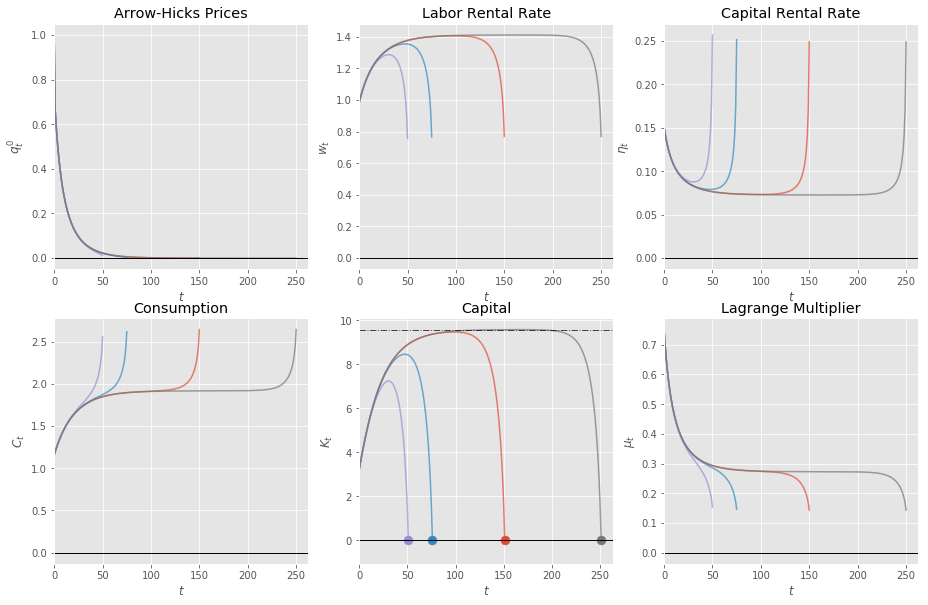

In [53]:
plt.subplot(231)
plt.plot(range(T_new+1),q_path_1,q_path_2,alpha=.7)
plt.plot(range(T_new_3+1),q_path_3, alpha=.7)
plt.plot(range(T_new_large+1),q_path_large,alpha=.7)
plt.title('Arrow-Hicks Prices')
plt.ylabel('$q_t^0$')
plt.xlabel('$t$')
plt.xlim(0,)
plt.axhline(0,color='black', lw=1)

plt.subplot(232)
plt.plot(range(T_new+1),w_path_1[:T_new+1],alpha=.7)
plt.plot(range(T_new_2+1),w_path_2[:T_new_2+1],alpha=.7)
plt.plot(range(T_new_3+1),w_path_3[:T_new_3+1], alpha=.7)
plt.plot(range(T_new_large+1),w_path_large[:T_new_large+1],alpha=.7)
plt.title('Labor Rental Rate')
plt.ylabel('$w_t$')
plt.xlabel('$t$')
plt.xlim(0,)
plt.axhline(0,color='black', lw=1)

plt.subplot(233)
plt.plot(range(T_new+1),eta_path_1[:T_new+1],eta_path_2[:T_new_2+1],alpha=.7)
plt.plot(range(T_new_3+1),eta_path_3[:T_new_3+1], alpha=.7)
plt.plot(range(T_new_large+1),eta_path_large[:T_new_large+1],alpha=.7)
plt.title('Capital Rental Rate')
plt.ylabel('$\eta_t$')
plt.xlabel('$t$')
plt.xlim(0,)
plt.axhline(0,color='black', lw=1)
plt.subplots_adjust(left=0.0, wspace=0.5, top=0.8)

plt.subplot(234)
plt.plot(range(T_new+1),path_opt_C_new,path_opt_C_2,alpha=.7)
plt.plot(range(T_new_3+1),path_opt_C_3, alpha=.7)
plt.plot(range(T_new_large+1),path_opt_C_large,alpha=.7)
plt.title('Consumption')
plt.ylabel('$C_t$')
plt.xlabel('$t$')
plt.xlim(0,)
plt.axhline(0,color='black', lw=1)

plt.subplot(235)
plt.plot(range(T_new+2),path_opt_K_new,path_opt_K_2,alpha=.7)
plt.plot(range(T_new_3+2),path_opt_K_3, alpha=.7)
plt.plot(range(T_new_large+2),path_opt_K_large,alpha=.7)
plt.axhline(0,linestyle='-',color='black', lw=1)
plt.axhline(K_ss,linestyle='-.',color='black',lw=1,  alpha=.7)
plt.title('Capital')
plt.ylabel('$K_t$')
plt.xlabel('$t$')
plt.xlim(0,)
plt.scatter(T_new+1,0,s=80)
plt.scatter(T_new_2+1,0,s=80)
plt.scatter(T_new_3+1,0,s=80)
plt.scatter(T_new_large+1,0,s=80)

plt.subplot(236)
plt.plot(range(T_new+1),path_opt_mu_new,path_opt_mu_new_2,alpha=.7)
plt.plot(range(T_new_3+1),path_opt_mu_new_3,alpha=.7)
plt.plot(range(T_new_large+1),path_opt_mu_large,alpha=.7)
plt.title('Lagrange Multiplier')
plt.ylabel('$\mu_t$')
plt.xlabel('$t$')
plt.xlim(0,)
plt.axhline(0,color='black', lw=1)
plt.subplots_adjust(right=2, wspace=0.2, top=2)
plt.show()

### Varying $\gamma$

Now we see how our results change if we keep T constant, but allow the curvature parameter, $\gamma$ to vary, starting with $K_0$ below the steady state. 

We plot the results for $T=150$.

In [54]:
%%capture
C_ss= f(k=K_ss,A=Ā,α=ᾱ)-δ*K_ss
C_ss_growth=0
γ_1 = 1.1
γ_2 = 4
γ_3 = 6
γ_4 = 8
T_new_large=T_new
C_new_large=C_new
K_new_large=K_new
path_opt_C_large,path_opt_K_large,path_opt_mu_large=bisection_method(.3,C_new_large,K_new_large,T_new_large,γ̄,δ,β,ᾱ,Ā);
path_opt_C_large_1,path_opt_K_large_1,path_opt_mu_large_1=bisection_method(.3,C_new_large,K_new_large,T_new_large,γ_1,δ,β,ᾱ,Ā);
path_opt_C_large_2,path_opt_K_large_2,path_opt_mu_large_2=bisection_method(.3,C_new_large,K_new_large,T_new_large,γ_2,δ,β,ᾱ,Ā);
path_opt_C_large_3,path_opt_K_large_3,path_opt_mu_large_3=bisection_method(.3,C_new_large,K_new_large,T_new_large,γ_3,δ,β,ᾱ,Ā);
path_opt_C_large_4,path_opt_K_large_4,path_opt_mu_large_4=bisection_method(.3,C_new_large,K_new_large,T_new_large,γ_4,δ,β,ᾱ,Ā);


q_path_large = q(β,path_opt_C_large,T_new_large,γ̄)
q_path_large_1 = q(β,path_opt_C_large_1,T_new_large,γ_1)
q_path_large_2 = q(β,path_opt_C_large_2,T_new_large,γ_2)
q_path_large_3 = q(β,path_opt_C_large_3,T_new_large,γ_3)
q_path_large_4 = q(β,path_opt_C_large_4,T_new_large,γ_4)

w_path_large =w(Ā,path_opt_K_large,ᾱ)
w_path_large_1= w(Ā,path_opt_K_large_1,ᾱ)
w_path_large_2 = w(Ā,path_opt_K_large_2,ᾱ)
w_path_large_3=w(Ā,path_opt_K_large_3,ᾱ)
w_path_large_4=w(Ā,path_opt_K_large_4,ᾱ)

eta_path_large = η(Ā,path_opt_K_large,ᾱ)
eta_path_large_1 = η(Ā,path_opt_K_large_1,ᾱ)
eta_path_large_2 = η(Ā,path_opt_K_large_2,ᾱ)
eta_path_large_3 = η(Ā,path_opt_K_large_3,ᾱ)
eta_path_large_4 = η(Ā,path_opt_K_large_4,ᾱ)

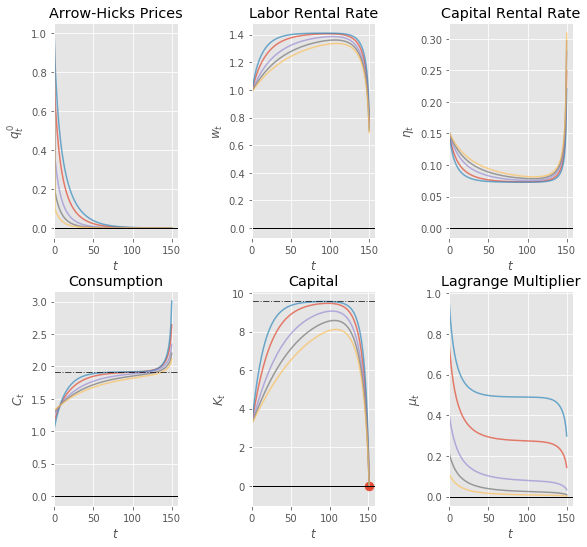

In [55]:
plt.subplot(231)
plt.plot(range(T_new_large+1),q_path_large,q_path_large_1,alpha=.7)
plt.plot(range(T_new_large+1),q_path_large_2, alpha=.7)
plt.plot(range(T_new_large+1),q_path_large_3,alpha=.7)
plt.plot(range(T_new_large+1),q_path_large_4,alpha=.7)

plt.title('Arrow-Hicks Prices')
plt.ylabel('$q_t^0$')
plt.xlabel('$t$')
plt.xlim(0,)
plt.axhline(0,color='black', lw=1)

plt.subplot(232)
plt.plot(range(T_new_large+1),w_path_large[:T_new_large+1],alpha=.7)
plt.plot(range(T_new_large+1),w_path_large_1[:T_new_large+1],alpha=.7)
plt.plot(range(T_new_large+1),w_path_large_2[:T_new_large+1], alpha=.7)
plt.plot(range(T_new_large+1),w_path_large_3[:T_new_large+1],alpha=.7)
plt.plot(range(T_new_large+1),w_path_large_4[:T_new_large+1],alpha=.7)
plt.title('Labor Rental Rate')
plt.ylabel('$w_t$')
plt.xlabel('$t$')
plt.xlim(0,)
plt.axhline(0,color='black', lw=1)

plt.subplot(233)
plt.plot(range(T_new_large+1),eta_path_large[:T_new_large+1],eta_path_large_1[:T_new_large+1],alpha=.7)
plt.plot(range(T_new_large+1),eta_path_large_2[:T_new_large+1], alpha=.7)
plt.plot(range(T_new_large+1),eta_path_large_3[:T_new_large+1],alpha=.7)
plt.plot(range(T_new_large+1),eta_path_large_4[:T_new_large+1],alpha=.7)

plt.title('Capital Rental Rate')
plt.ylabel('$\eta_t$')
plt.xlabel('$t$')
plt.xlim(0,)
plt.axhline(0,color='black', lw=1)
plt.subplots_adjust(left=0.0, wspace=0.5, top=0.8)


plt.subplot(234)
plt.plot(range(T_new_large+1),path_opt_C_large,path_opt_C_large_1,alpha=.7)
plt.plot(range(T_new_large+1),path_opt_C_large_2,alpha=.7)
plt.plot(range(T_new_large+1),path_opt_C_large_3,alpha=.7)
plt.plot(range(T_new_large+1),path_opt_C_large_4,alpha=.7)
plt.axhline(C_ss,linestyle='-.',color='black', lw=1,alpha=.7)
plt.title('Consumption')
plt.ylabel('$C_t$')
plt.xlabel('$t$')
plt.xlim(0,)
plt.axhline(0,color='black', lw=1)


plt.subplot(235)
plt.plot(range(T_new_large+2),path_opt_K_large,path_opt_K_large_1,alpha=.7)
plt.plot(range(T_new_large+2),path_opt_K_large_2,alpha=.7)
plt.plot(range(T_new_large+2),path_opt_K_large_3,alpha=.7)
plt.plot(range(T_new_large+2),path_opt_K_large_4,alpha=.7)
plt.axhline(0,linestyle='-',color='black', lw=1)
plt.axhline(K_ss,linestyle='-.',color='black',lw=1,  alpha=.7)
plt.title('Capital')
plt.ylabel('$K_t$')
plt.xlabel('$t$')
plt.xlim(0,)
plt.scatter(T_new_large+1,0,s=80)

plt.subplot(236)
plt.plot(range(T_new_large+1),path_opt_mu_large,path_opt_mu_large_1,alpha=.7) 
plt.plot(range(T_new_large+1),path_opt_mu_large_2,alpha=.7) 
plt.plot(range(T_new_large+1),path_opt_mu_large_3,alpha=.7) 
plt.plot(range(T_new_large+1),path_opt_mu_large_4,alpha=.7) 
plt.axhline(0,linestyle='-',color='black', lw=1)
plt.title('Lagrange Multiplier')
plt.ylabel('$\mu_t$')
plt.xlabel('$t$')
plt.axhline(0,color='black', lw=1)
plt.xlim(0,)
plt.subplots_adjust(left=0.0, wspace=0.6, top=1.8,hspace=0.25,right=1.2)
plt.show()

Adjusting $\gamma$ means adjusting how much individuals prefer to smooth consumption

Higher $\gamma$ means individuals prefer to smooth more resulting in slower adjustments to the steady state allocations

Vice-versa for lower $\gamma$ 

### Yield Curves and Hicks-Arrow Prices Again
Now, we compute Hicks-Arrow prices again, but also calculate the implied the yields to maturity. 

This will let us plot a  **yield curve**.

The key formulas are:


The **yield to maturity** $$r_{t_0,t}= -\frac{\log q^{t_0}_t}{t} \label{4.1} \tag{4.1} $$
A generic Hicks-Arrow price for any base-year $t_0\leq t$ 
$$q^{t_0}_t = \beta^{t-t_0} \frac{u'(c_t)}{u'(c_{t_0})}= \beta^{t-t_0} \frac{c_t^{-\gamma}}{c_{t_0}^{-\gamma}} \label{4.2} \tag{4.2}$$

We redefine our function for $q$ to allow arbitrary base years, and define a new function for $r$, then plot both.

First we plot when $t_0=0$ as before, for different values of $T$, with $K_0$ below the steady state.

In [56]:
# function definition of q. 
@njit
def q(t_0,β,c,T,γ): #here we choose numeraire to be u'(c_0). This is q^(t_0)_t
    q = np.zeros(T+1-t_0) 
    q[0]=1
    for t in range(t_0+1,T+2):
        q[t-t_0] =β**(t-t_0)*u_prime(c[t],γ)/u_prime(c[t_0],γ) 
    return q
# function definition of r, yield to maturity
@njit
def r_m(t_0,β,c,T,γ):
    r = np.zeros(T+1-t_0)
    for t in range(t_0+1,T+2):
        r[t-t_0]= - np.log(q(t_0,β,c,T,γ)[t-t_0])/(t-t_0)
    return r

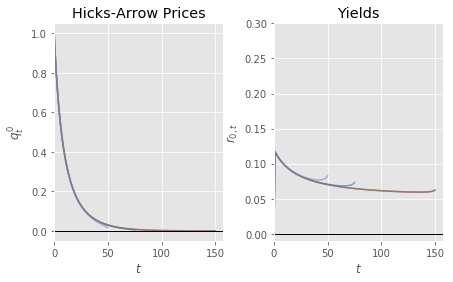

In [57]:
t_init=0
q_path_1 = q(t_init,β,path_opt_C_new,T_new,γ̄)
q_path_2 = q(t_init,β,path_opt_C_2,T_new_2,γ̄)
q_path_3 = q(t_init,β,path_opt_C_3,T_new_3,γ̄)
q_path_large = q(t_init,β,path_opt_C_large,T_new_large,γ̄)

r_path_1=r_m(t_init,β,path_opt_C_new,T_new,γ̄)
r_path_2 = r_m(t_init,β,path_opt_C_2,T_new_2,γ̄)
r_path_3 = r_m(t_init,β,path_opt_C_3,T_new_3,γ̄)
r_path_large = r_m(t_init,β,path_opt_C_large,T_new_large,γ̄)


plt.subplot(121)
plt.plot(range(T_new+1-t_init),q_path_1,q_path_2,alpha=.7)
plt.plot(range(T_new_3+1-t_init),q_path_3, alpha=.7)
plt.plot(range(T_new_large+1-t_init),q_path_large,alpha=.7)
plt.title('Hicks-Arrow Prices')
plt.ylabel('$q_t^0$')
plt.xlabel('$t$')
plt.xlim(0,)
plt.axhline(0,color='black', lw=1)

plt.subplot(122)
plt.plot(range(T_new+1-t_init),r_path_1,r_path_2,alpha=.7)
plt.plot(range(T_new_3+1-t_init),r_path_3, alpha=.7)
plt.plot(range(T_new_large+1-t_init),r_path_large,alpha=.7)
plt.title('Yields')
plt.ylabel('$r_{0,t}$')
plt.xlabel('$t$')
plt.ylim(-.01,.3)
plt.xlim(0,)
plt.axhline(0,color='black', lw=1)
plt.subplots_adjust(left=0.0, wspace=0.3)

Now we plot when $t_0=20$ 

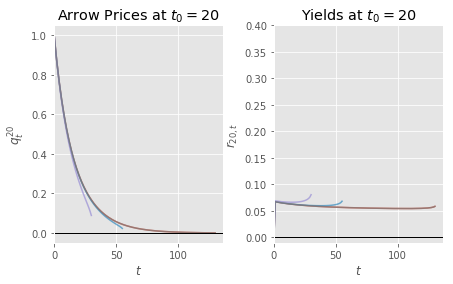

In [58]:
t_init=20
q_path_1 = q(t_init,β,path_opt_C_new,T_new,γ̄)
q_path_2 = q(t_init,β,path_opt_C_2,T_new_2,γ̄)
q_path_3 = q(t_init,β,path_opt_C_3,T_new_3,γ̄)
q_path_large = q(t_init,β,path_opt_C_large,T_new_large,γ̄)

r_path_1=r_m(t_init,β,path_opt_C_new,T_new,γ̄)
r_path_2 = r_m(t_init,β,path_opt_C_2,T_new_2,γ̄)
r_path_3 = r_m(t_init,β,path_opt_C_3,T_new_3,γ̄)
r_path_large = r_m(t_init,β,path_opt_C_large,T_new_large,γ̄)

plt.subplot(121)
plt.plot(range(T_new+1-t_init),q_path_1,q_path_2,alpha=.7)
plt.plot(range(T_new_3+1-t_init),q_path_3, alpha=.7)
plt.plot(range(T_new_large+1-t_init),q_path_large,alpha=.7)
plt.title('Arrow Prices at $t_0=20$')
plt.ylabel('$q_t^{20}$')
plt.xlabel('$t$')
plt.xlim(0,)
plt.axhline(0,color='black', lw=1)

plt.subplot(122)
plt.plot(range(T_new+1-t_init),r_path_1,r_path_2,alpha=.7)
plt.plot(range(T_new_3+1-t_init),r_path_3, alpha=.7)
plt.plot(range(T_new_large+1-t_init),r_path_large,alpha=.7)
plt.title('Yields at $t_0=20$')
plt.ylabel('$r_{20,t}$')
plt.xlabel('$t$')
plt.ylim(-.01,.4)
plt.xlim(0,)
plt.axhline(0,color='black', lw=1)
plt.subplots_adjust(left=0.0, wspace=0.3)

In [1]:
 %%javascript
MathJax.Hub.Config({
    TeX: { equationNumbers: { autoNumber: "None" },
         }
});
 

<IPython.core.display.Javascript object>